In [1]:
# set precision
pd.set_option('display.precision', 14)
# import modules
import pandas as pd

# import Co training data using the pandas library and convert them into a dataframe
raw_data = pd.read_excel('data/Co_temperature.xlsx')
raw_data.dropna(axis='rows', inplace=True)

random_state = 1
raw_data.describe()



<IPython.core.display.Javascript object>

,Unnamed: 0,Oxygen vacancy,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
count,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000
mean,1586.20863557858365,0.25374497011683,7.96945326090710,2.62581894972079,1.24828639732649,1.40878574285915,0.62058314223614,0.99145686208105,491.14853195164073
std,879.48421618489101,0.14855562838597,5.13948052323340,0.35940128546514,0.13197701780728,0.06894585859586,0.02381051198844,0.02500012220108,210.92017615391325
min,0.00000000000000,-0.00229500000000,2.72371750632620,2.00000000000000,0.96478260869565,1.24020000000000,0.59600000000000,0.92689034414490,25.00000000000000
25%,843.50000000000000,0.14858250000000,4.99301561365949,2.50000000000000,1.14000000000000,1.37600000000000,0.61000000000000,0.97616997689958,350.00000000000000
50%,1594.00000000000000,0.23966500000000,5.69126378286684,2.50000000000000,1.19600000000000,1.39750000000000,0.61082191780822,0.99158127854083,500.00000000000000
75%,2337.50000000000000,0.34171764200086,8.92058622914923,2.71428571428571,1.35714285714286,1.44000000000000,0.61875000000000,1.00473133232742,650.00000000000000
max,3106.00000000000000,0.98181800000000,32.82656162883060,4.23677581863980,1.69536585365854,1.61000000000000,0.74500000000000,1.06426785943894,800.00000000000000


In [2]:
from sklearn.utils import shuffle
# take the oxygen vacancy as the label
Y = raw_data.loc[:, 'Oxygen vacancy'].values

# take the other collumns as the features
X = raw_data.iloc[:, 3:]


X, y = shuffle(X, Y, random_state=random_state)
X.head()

,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
2417,10.88061039101431,2.58974358974359,1.42051282051282,1.4400,0.602000,1.01223318831030,700
1543,5.01792114695341,2.50000000000000,1.20500000000000,1.3400,0.610000,0.97181855055382,500
1600,5.08241496339231,2.22727272727273,1.11590909090909,1.4400,0.634375,0.99563499927754,500
238,4.87126828290924,2.50000000000000,1.13500000000000,1.4250,0.610000,1.00264115383631,25
2824,9.39222762639121,2.74358974358974,1.37641025641026,1.3945,0.611750,0.99069219580101,750


In [3]:
# read Fe training data
data_fe = pd.read_excel('data/Fe_temperature.xlsx')
data_fe.dropna(axis='rows', inplace=True)
Y_fe = data_fe.loc[:, 'Oxygen vacancy'].values

# take the other collumns as the features and do shuffle
X_fe = data_fe.iloc[:, 3:]

X_fe, y_fe = shuffle(X_fe, Y_fe, random_state=random_state)
X_fe.head()

,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
966,2.69113080014615,2.05000000000000,0.91050000000000,1.5975,0.6450,1.04641116863249,400
860,3.81557427418059,2.00000000000000,1.26333333333333,1.6100,0.6620,1.04194056168847,400
2006,2.77777777777778,2.00000000000000,1.03000000000000,1.4400,0.6450,0.99030571873985,700
1409,6.07638888888889,2.27272727272727,1.10636363636364,1.4400,0.6445,0.99055522887307,550
1654,5.05902991797449,2.50000000000000,1.14500000000000,1.3945,0.6450,0.97409747765976,600


In [4]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
# Scikit-learn packages
from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

reg = ExtraTreesRegressor(n_estimators=100, random_state=random_state)
reg.fit(X_train, y_train)
print(f"Test R2 score: {reg.score(X_test, y_test):f}")
predictions = reg.predict(X_test)



Test R2 score: 0.856295


In [5]:
import seaborn as sns
vis_data = pd.DataFrame.from_records({'pred': predictions, 'label': y_test})
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="label", y="pred", data=vis_data,
                  kind="reg", truncate=False,
                  color="m", height=7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

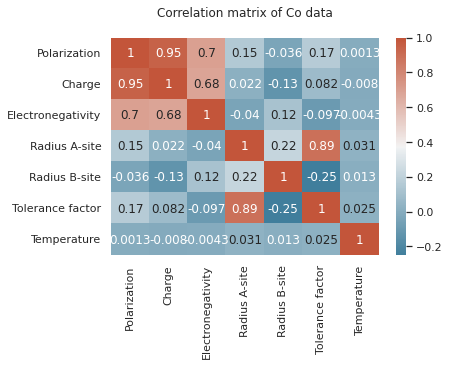

In [6]:
import matplotlib.pyplot as plt
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
# hm = sns.heatmap(X.corr(), cmap=cmap, mask=mask, annot = True)
hm = sns.heatmap(X.corr(), cmap=cmap, annot = True)
hm.set(title = "Correlation matrix of Co data\n")

plt.show()

In [7]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# !pip install xgboost
# !pip install lightgbm
# !pip install lazypredict
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Setting up max columns displayed to 100
# pd.options.display.max_columns = 100

kf = KFold(n_splits=5, random_state=random_state, shuffle=True)
results = []
prediction_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LazyRegressor(predictions=True)
    models, prediction = reg.fit(X_train, X_test, y_train, y_test)
    prediction_list.append(prediction)
    results.append(models)
    
df_concat = pd.concat(results)
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_sorted = df_means.sort_values(by='R-Squared', ascending=False)

df_pred_concat = pd.concat(prediction_list)
by_pred_row_index = df_pred_concat.groupby(df_pred_concat.index)
df_pred_sorted = by_pred_row_index.mean().iloc[:-1, :]

<IPython.core.display.Javascript object>

100%|██████████| 42/42 [00:05<00:00,  7.03it/s]


In [8]:
df_sorted['R-Squared'][0]

0.9112635451565977

In [15]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(range(31)), y=list(df_sorted['R-Squared'])[:31], palette="rocket")
plt.xticks(list(range(31)), list(df_sorted.index)[:31], rotation=45, fontsize='17', horizontalalignment='right')

ValueError: Grouper for '<class 'numpy.float64'>' not 1-dimensional

<Figure size 1440x576 with 0 Axes>

In [10]:
df_sorted['R-Squared'][1]

0.9112270174464943

<module 'matplotlib.pyplot' from '/home/uqyluo/anaconda3/envs/Chemical/lib/python3.6/site-packages/matplotlib/pyplot.py'>

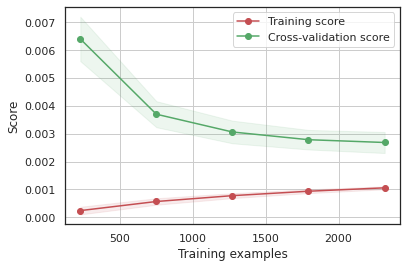

In [11]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import numpy as np
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if ylim is not None:
        plt.set_ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring = 'neg_mean_squared_error'
    )
    train_scores = - train_scores
    test_scores = - test_scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")

    return plt

# fig, axes = plt.subplots(3, 1, figsize=(10, 10))
title = "Learning Curves"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=random_state)

estimator =  ExtraTreesRegressor(n_estimators=100, random_state=random_state)
plot_learning_curve(
    estimator, title, X, y, axes=None, cv=cv, n_jobs=4
)


In [12]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
# Scikit-learn packages
from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.2, random_state=random_state)

reg = ExtraTreesRegressor(n_estimators=100, random_state=random_state)
reg.fit(X_train, y_train)
print(f"Test R2 score: {reg.score(X_test, y_test):f}")
predictions = reg.predict(X_test)



Test R2 score: 0.867398


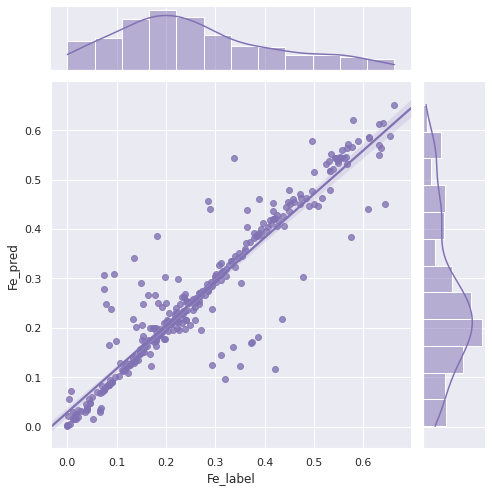

In [13]:
import seaborn as sns
vis_data = pd.DataFrame.from_records({'Fe_pred': predictions, 'Fe_label': y_test})
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="Fe_label", y="Fe_pred", data=vis_data,
                  kind="reg", truncate=False,
                  color="m", height=7)

<module 'matplotlib.pyplot' from '/home/uqyluo/anaconda3/envs/Chemical/lib/python3.6/site-packages/matplotlib/pyplot.py'>

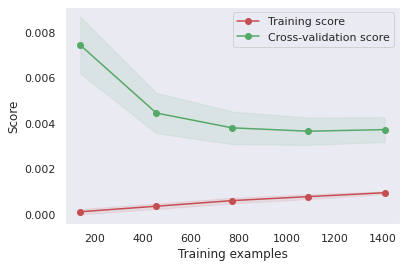

In [14]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=random_state)

estimator =  ExtraTreesRegressor(n_estimators=100, random_state=random_state)
plot_learning_curve(
    estimator, title, X_fe, y_fe, axes=None, cv=cv, n_jobs=4
)